# Part II - (Analysis for Ford GoBike System Data)
## by (Amaal Ahmed)

## Investigation Overview

- There is no relationship between **(bike sharing for all trip - user gender - user type)** and the relationship between **age and trip duration**. <br>

- **Finally**, Most common bike users' persona is **Male** who is a **subscriber** with **age** between **20 and 60** years old.



## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area: <br>

         - Trip Duration (Seconds).
         - Trip Start Time and Date.
         - Trip End Time and Date.
         - Start Station ID.
         - Start Station Name.
         - Start Station Latitude.
         - Start Station Longitude
         - End Station ID.
         - End Station Name.
         - End Station Latitude.
         - End Station Longitude.
         - Bike ID.
         - User Type : ['Subscriber', 'Customer']
         - Member Birth Year.
         - Member Gender.
         - Bike Share for All Trip : ['No','Yes']

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
gobike_df.dropna(inplace=True)

In [4]:
# convert user_type, member_gender, and bike_share_for_all_trip into categorical types
Category_dict = {'user_type': ['Subscriber', 'Customer'],
                   'member_gender': ['Male','Female', 'Other'],
                   'bike_share_for_all_trip': ['No','Yes']}

for var in Category_dict:
    Category_var = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = Category_dict[var])
    gobike_df[var] = gobike_df[var].astype(Category_var)

In [5]:
# convert columns types
dtype_dict = {'start_time': 'datetime64[ns]',
         'end_time': 'datetime64[ns]',
        'start_station_id': 'object',
        'start_station_latitude': 'object',
        'start_station_longitude': 'object',
        'end_station_id': 'object',
        'end_station_latitude': 'object',
        'end_station_longitude': 'object',
        'bike_id': 'object',
        'member_birth_year':'int'}

gobike_df = gobike_df.astype(dtype_dict)

In [6]:
gobike_df.drop(['start_station_id','end_station_id','bike_id','start_station_longitude','start_station_latitude','end_station_longitude','end_station_latitude'],axis=1,inplace=True)

In [7]:
# function to avoid repetitive code
def fig(fig_title):
    plt.figure(figsize=(10,6))
    plt.title(fig_title, fontsize=15)

## Bike Sharing for All Trip with User Type

Bike sharing for all trip is **only** available to Subscriber.

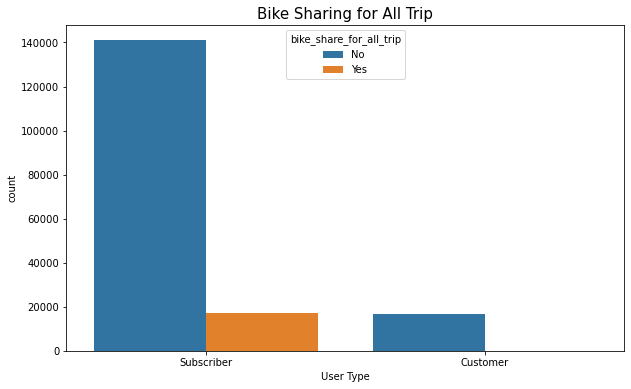

In [8]:
fig("Bike Sharing for All Trip")
sb.countplot(data = gobike_df, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.xlabel('User Type')
plt.show()

## Bike User Gender

**Male** is the most bike user gender.

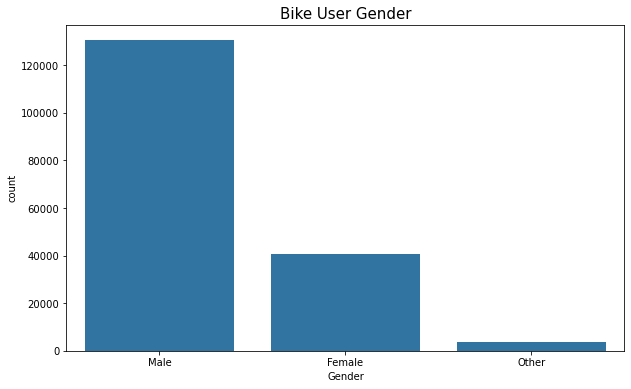

In [9]:
fig('Bike User Gender')
base_color = sb.color_palette()[0]
sb.countplot(data = gobike_df, x = 'member_gender', color = base_color)
plt.xlabel('Gender')
plt.show()

## Bike Users' Age with The Trip Duration

The most common trip **durations** are **below 6000 seconds** and **ages** between **20 and 60**.

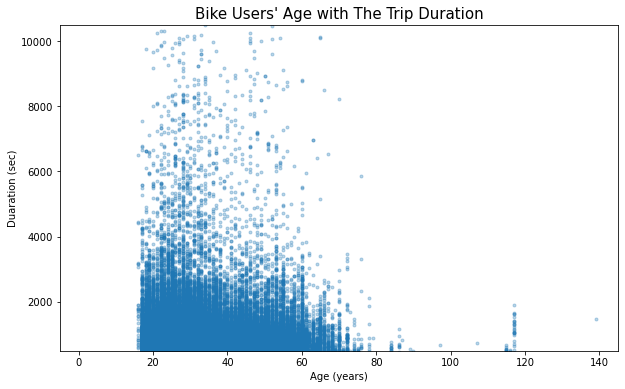

In [10]:
fig("Bike Users' Age with The Trip Duration")
plt.scatter((2017-gobike_df['member_birth_year']), gobike_df['duration_sec'], alpha = 0.3, marker = '.')
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()

In [11]:
# function to avoid repetitive code
def plot_scatter(cols, plot_title):
    sub_plot = sb.FacetGrid(data=gobike_df,col=cols,height=3,aspect=2)
    sub_plot.map(plt.scatter, data=gobike_df, x=(2017-gobike_df['member_birth_year']),y='duration_sec', alpha = 0.3)
    sub_plot.set_axis_labels('Age (Years)','Duration (Sec)')
    plt.suptitle(plot_title, fontsize=12);

## Bike Users' Type with Age and Duration

User type has **no effect** on the relationship between age and trip duration.

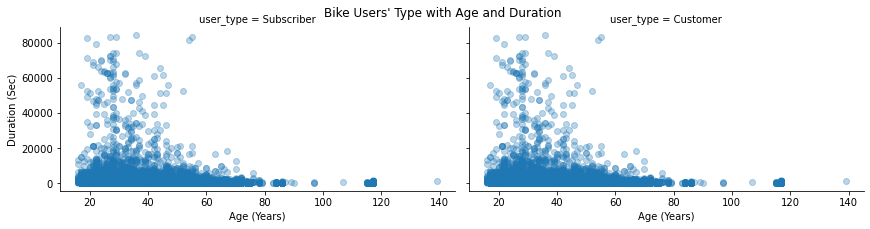

In [12]:
plot_scatter('user_type', "Bike Users' Type with Age and Duration")

## Bike Users' Gender with Age and Duration

User gender has **no effect** on the relationship between age and trip duration.

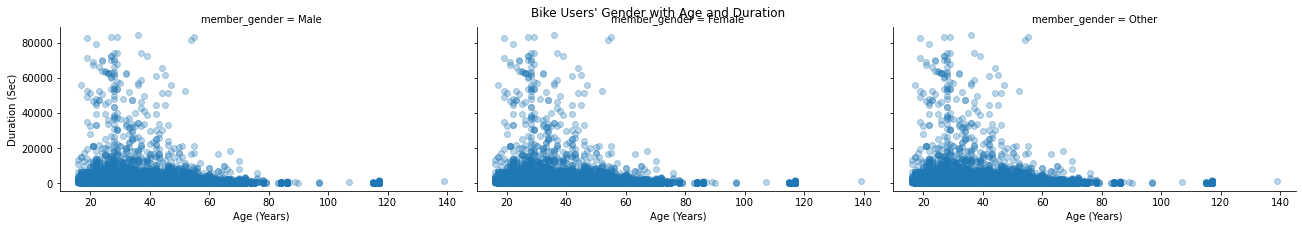

In [13]:
plot_scatter('member_gender', "Bike Users' Gender with Age and Duration")

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt